# 자동 생성 기사 제거

In [ ]:
cd 'data/rawdata/뉴스기사'

In [ ]:
import os
import pandas as pd

path = "./"
file_list = os.listdir(path)

print ("file_list: {}".format(file_list))

file_list: ['뉴스_동영상.csv', '뉴스_지면기사.csv', '뉴스_포토.csv']


In [ ]:
df = pd.DataFrame()
for file in file_list:
    csv_reader = pd.read_csv(file)
    df = df.append(csv_reader, ignore_index=True)

In [ ]:
df

,날짜,기사
0,2021.04.30.,"민주당 박용진 ""블록체인 장려하고 코인(가상화폐)은 단속? 꼰대적 발상"""
1,2021.04.30.,"순천시, 전남 최초로 지방세 체납자 가상화폐 압류조치 시행"
2,2021.04.30.,"천안시, 비양심·고액 체납자 가상화폐 압류"
3,2021.04.30.,'코인광풍'에 가상화폐 거래소 제휴 은행 수수료 수입 급증…업비트 제휴사 케...
4,2021.04.30.,[업비트 특징주] 파르마체인·온톨로지가스·스테이터스네트워크토큰 5% 상승...
...,...,...
168281,2018.08.02.,‘보물선 논란’ 신일그룹 대표 “손 떼겠다”…인양 불투명
168282,2018.08.02.,'보물선 의혹' 핵심 유지범은 어떤 인물?
168283,2018.08.02.,‘보물선 논란’ 신일그룹 대표 “손 떼겠다”…인양 불투명
168284,2018.08.02.,[단독] '투자금을 대표 개인 계좌로?'...커지는 보물선 의혹


In [ ]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)

In [ ]:
df.groupby('날짜').count().to_csv('../../output/news_counts_all.csv')

In [ ]:
import re

In [ ]:
def check_auto(dt, top_n=None, threshold=None): 
    """
    자동생성 기사인지 확인을 위해 반복되는 기사 확인
    """
    
    import re
    from collections import Counter

    tmp = [re.sub(r'[0-9]+', '', string) for string in dt['기사']]
    tmp = [re.sub(r'[-=+,#/\?:^$.@*\"※~&ㆍ!』\\‘|\<\>`\'…》“”【】’·]+', '', string) for string in tmp]
    if top_n is not None:
        dic = {k: v for k, v in sorted(Counter(tmp).items(), key=lambda item: item[1], reverse=True)[:top_n]}
    elif threshold is not None:
        dic = {k: v for k, v in Counter(tmp).items() if v >= threshold}
        dic = {k: v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)[-50:-1]}
    
    for k, v in dic.items():
        print('"%s": %d' % (k, v))

In [ ]:
def remove_auto(dt, regex=None, threshold=None):
    """
    자동생성 기사일 경우 해당 함수를 통해 제거
    """
    
    import re

    if regex is not None:
        ls = []
        tmp = {}

        for i in range(dt.shape[0]):
            tmp[i] = regex.search(dt['기사'].iloc[i])
            if tmp[i] != None:
                ls.append(i)
        print(dt.loc[ls[:20], '기사'])
        dt.drop(index=ls, axis=0, inplace=True)
        print('%d개 기사를 삭제하였습니다.' % (len(ls)))
        dt.reset_index(drop=True, inplace=True)
        return dt
    
    
    elif threshold is not None:
        from collections import Counter

        tmp = [re.sub(r'[0-9]+', '', string) for string in dt['기사']]
        tmp = [re.sub(r'[-=+,#/\?:^$.@*\"※~&ㆍ!』\\‘|\<\>`\'…》“”【】’·]+', '', string) for string in tmp]
        filtered = [el[0] for el in Counter(tmp).items() if el[1] >= threshold]
        # print(filtered[:5])
        idx = [i for i, v in enumerate(tmp) if v in filtered]
        print(dt.loc[idx[:10], '기사'])
        dt.drop(index=idx, axis=0, inplace=True)
        print('%d개 기사를 삭제하였습니다.' % (len(idx)))
        dt.reset_index(drop=True, inplace=True)
        return dt
    
    else:
        print("기준을 정해주세요.")

In [ ]:
df

,날짜,기사
0,2021.04.30.,"민주당 박용진 ""블록체인 장려하고 코인(가상화폐)은 단속? 꼰대적 발상"""
1,2021.04.30.,"순천시, 전남 최초로 지방세 체납자 가상화폐 압류조치 시행"
2,2021.04.30.,"천안시, 비양심·고액 체납자 가상화폐 압류"
3,2021.04.30.,'코인광풍'에 가상화폐 거래소 제휴 은행 수수료 수입 급증…업비트 제휴사 케...
4,2021.04.30.,[업비트 특징주] 파르마체인·온톨로지가스·스테이터스네트워크토큰 5% 상승...
...,...,...
148678,2018.08.02.,[취재N팩트] 커지는 사기 의혹...보물선 투자자 '울상'
148679,2018.08.02.,‘보물선 논란’ 신일그룹 대표 “손 떼겠다”…인양 불투명
148680,2018.08.02.,'보물선 의혹' 핵심 유지범은 어떤 인물?
148681,2018.08.02.,[단독] '투자금을 대표 개인 계좌로?'...커지는 보물선 의혹


In [ ]:
check_auto(df, top_n=100)

"시 기준 가상화폐(암호화폐) 비트코인 만원대(%) 이더리움 만원": 5177
"[암호화폐] 이더리움 월 일 시 기준 시세는 원  원": 3612
"가상화폐(암호화폐) 주요 종목 상승세 월 일 시 기준 비트코인은 ": 2801
"시 기준 가상화폐(암호화폐) 이오스 원(%) 리플 원(%) 등": 2563
"시 기준 가상화폐(암호화폐) 이더리움 클래식 시세는 최소 원 최대 ": 2540
"[암호화폐 시황] 비트코인 %↓ 비트코인캐시 %↓ 비트코인골드 % ": 2424
"시 기준 가상화폐(암호화폐) 이더리움 클래식 시세는 최소 원 최대": 2412
"[암호화폐 시황] 비트코인 %↑ 비트코인캐시 %↑ 비트코인골드 % 이": 2362
"가상화폐(암호화폐) 기타 종목 상승세 월 일 시 기준 리플은 원(": 2323
"(월 일) 시 기준 암호화폐 최저가는 이더리움 원 비트코인 ": 2281
"가상화폐(암호화폐) 주요 종목 하락세 월 일 시 기준 비트코인은 ": 2132
"가상화폐(암호화폐) 기타 종목 하락세 월 일 시 기준 리플은 원(": 1833
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 카이버 네트워크(": 1796
"월 일 시 현재 암호화폐(가상화폐) 최고가는 이더리움 원 비트": 1700
"(월 일) 시 기준 암호화폐 최저가는 이더리움 클래식 원 이오스 ": 1494
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 비트코인 골드(": 1376
"시 기준 가상화폐(암호화폐) 이오스 원(%) 리플 원(%) ": 1307
"[암호화폐] 월 일 시 기준 이더리움 클래식 최저가는 원을 기록중": 1190
"시 기준 가상화폐(암호화폐) 이오스 원(%) 리플 원(%)": 1137
"(월 일 시) 거래소별 비트코인 리플 등 암호화폐 시세 정보": 1002
"[암호화폐 시황] 비트코인 %↑ 비트코인캐시 %↓ 비트코인골드 % 이": 929
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 비트코인 캐시(": 817
"[암호화폐 시황] 비트코인 %↓ 비트코인캐시 %↑ 비트코인골드 

In [ ]:
check_auto(df, threshold=5)

"[가상화폐] 일 오전 시 분 헤데라해시그래프 상승세 전일대비 %": 5
"[가상화폐] 일 오후 시 분 비트코인 % 하락 모스코인 % 상승": 5
"[가상화폐] 일 오전 시 분 비트코인 % 하락 베이직어텐션토큰 ": 5
"[가상화폐] 일 오후 시 분 리퍼리움 원 상승한 원에 거래": 5
"[가상화폐] 일 오후 시 분 비트코인(%) 크립토닷컴(%)": 5
"[가상화폐] 일 오전 시 분 비트코인(%) 비트코인캐시(%)": 5
"[가상화폐] 일 오전 시 분 온톨로지 원(%) 거래중": 5
"[가상화폐] 일 오전 시 분 비트코인(%) 온톨로지(%)": 5
"[가상화폐] 일 오전 시 분 비트코인(%) 엘프(%)": 5
"[가상화폐] 일 오후 시 분 비트코인 % 상승 이그니스 % 상승": 5
"[가상화폐] 일 오후 시 분 어거 상승세 전일대비 %": 5
"[가상화폐] 일 오후 시 분 비트코인(%) 어거(%)": 5
"[가상화폐] 일 오전 시 분 어거 원 상승한 원에 거래": 5
"[가상화폐] 일 오후 시 분 코모도 상승세 전일대비 %": 5
"가상화폐 대체로 내림세 비트코인 이더리움 리플 모두 떨어져": 5
"[가상화폐 시세] 비트코인 % ↓ 주요 암호화폐 혼조세": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 이오스(%) 퀀": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 퀀텀(%) 스트리머(": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 스트리머(%) 아이": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 이오스(%) 오": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 이오스(%) 퀀텀": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 퀀텀(%) 카이버 네": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 퀀텀(%) 오미": 5
"[암호화폐 시황] 비트코인 % 비트코인캐시 %↑ 비트코인골드 %↓ 이": 5
"[가상화폐 뉴스] 월 일 시 분 비트코인(%) 리플(%) 이오스": 5
"[업비트 상승률 Top   시황] 비트코인

- 5번 이상 반복되는 기사들의 경우 자동생성일 확률이 높음 -> 제거

In [ ]:
df = remove_auto(df, threshold=5)

154    [글로벌 블록체인] 4월 30일 오전 뉴스 브리핑
183       [연합뉴스 이 시각 헤드라인] - 08:00
255      [4월30일자] 비즈니스포스트 아침의 주요기사
315        [가상화폐 시세]비트코인 6천4백만원 안팎
361               비트코인 6천400만원대 거래
446               오늘 주요 신문 사설(29일)
489       [연합뉴스 이 시각 헤드라인] - 08:00
517    매경이 전하는 세상의 지식(매-세-지,4월29일)
589      [4월29일자] 비즈니스포스트 아침의 주요기사
742              비트코인 6천200만원대로 하락
Name: 기사, dtype: object
83312개 기사를 삭제하였습니다.


In [ ]:
check_auto(df, top_n=100)

"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 혼조": 4
"[다시보기] 월 일 (금) 오전 사이언스 투데이": 4
"비트코인 만 원대 공방 가상화폐 시세 상승과 하락 엇비슷": 4
"상승세 이어가는 비트코인": 4
"[가상화폐 시세]비트코인 천백만원대 거래": 4
"비트코인 만 원대로 상승 가상화폐 시세 거의 다 오름세": 4
"비트코인 만 원대로 떨어져 가상화폐 시세 대체로 내림세": 4
"[가상화폐 시세]비트코인 천만원 초반": 4
"비트코인 만원대 거래": 4
"동서발전 경영성과보고서 퀴즈 이벤트 진행": 4
"비트코인 만 원대로 올라 가상화폐 시세 상승과 하락 엇비슷": 4
"우리기술투자비덴트 가상화폐 관련주 상승에 급등까지우리기술투자 % 급": 4
"코빗 가상자산 사업 및 투자 지침서 발간": 4
"비덴트우리기술투자 가상화폐 관련주 상승에 급등까지비덴트 % 급등 이": 4
"비트코인 사상 첫 만 달러 돌파": 4
"비트코인 만 원대 공방 가상화폐 혼조 테마기업 주가 상승": 4
"비트코인 만 달러 돌파": 4
"[Who Is ] 이주열 한국은행 총재": 4
"비트코인 만 원대로 밀려 가상화폐 시세 혼조세": 4
"비트코인 만 원대로 올라 가상화폐 시세 하락이 훨씬 많아": 4
"부여군 지역화폐 굿뜨래페이 누적발행액 억원 돌파": 4
"신한카드 블록체인 신용결제 시스템 일본 특허 등록": 4
"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 하락": 4
"[글로벌 블록체인] 월 일 오후 뉴스 브리핑": 4
"비트코인 만 원대로 올라 가상화폐 시세 대부분 상승세": 4
"김영록 전남지사 주간 사회적거리두기 단계 격상": 4
"홍성국 의원 가상화폐 돈세탁 감독법 대표발의": 4
"가상화폐 앵커 상승세 전일대비 %": 4
"[가상화폐] 일 오전 시 분 비트코인(%) 펀디엑스(%)": 4
"[가상화폐] 일 오전 시 분 스텔라루멘 원(%) 거래중": 4
"[가상화폐] 일 오후 시 분 비트코인(%) 스텔라루멘(%)": 4
"[가상화폐] 일 오후 시

- 정규표현식을 이용해 제거

In [ ]:
regex = re.compile(r"""\[가상화폐\][\w\W\s\d]*일[\w\W\s\d]*(오후|오전)[\w\W\s\d]*시[\w\W\s\d]*분[\w\W\s\d]*(전일대비|거래)|(빗썸|코인원|업비트)[\w\W\s\d]*상승률[\w\W\s\d]*Top""")

In [ ]:
df = remove_auto(df, regex)

22571          [가상화폐] 13일 오후 3시 30분 에이다 158원(+5.33%) 거래중
22574       [가상화폐] 13일 오후 1시 30분 코스모스 4,945원(+3.34%) 거래중
22583      [가상화폐] 13일 오전 10시 30분 스팀달러 상승세... 전일대비 +6.58%
22595       [가상화폐] 13일 오전 4시 30분 펀디엑스 상승세... 전일대비 +12.5%
22603      [가상화폐] 12일 오후 12시 30분 코스모스 상승세... 전일대비 +5.25%
22608        [가상화폐] 12일 오전 9시 30분 스텔라루멘 115원(+2.68%) 거래중
22610        [가상화폐] 12일 오전 5시 30분 비체인 1.2원 상승한 21.6원에 거래
22612       [가상화폐] 12일 오전 0시 30분 스텔라루멘 상승세... 전일대비 +6.6%
22617       [가상화폐] 11일 오전 11시 30분 스텔라루멘 116원(+9.43%) 거래중
22619     [가상화폐] 11일 오전 8시 30분 비트토렌트 0.08원 상승한 0.52원에 거래
22621       [가상화폐] 11일 오전 6시 30분 비트토렌트 0.5원(+13.64%) 거래중
22622      [가상화폐] 11일 오전 5시 30분 비트토렌트 0.49원(+11.36%) 거래중
22646    [가상화폐] 10일 오전 11시 30분 비트토렌트 0.03원 상승한 0.47원에 거래
22667        [가상화폐] 10일 오전 2시 30분 스텔라루멘 110원(+8.91%) 거래중
22682        [가상화폐] 9일 오후 4시 30분 스텔라루멘 112원(+10.89%) 거래중
22723           [가상화폐] 9일 오전 4시 30분 비체인 3원 상승한 23.6원에 거래
22725         [가상화폐] 9일 오전 2시 30분 비체인 23.1원(+12.14%) 거래중
22726         [가상화폐] 9일 오전 0시 3

In [ ]:
check_auto(df, top_n=100)

"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 혼조": 4
"[다시보기] 월 일 (금) 오전 사이언스 투데이": 4
"비트코인 만 원대 공방 가상화폐 시세 상승과 하락 엇비슷": 4
"상승세 이어가는 비트코인": 4
"[가상화폐 시세]비트코인 천백만원대 거래": 4
"비트코인 만 원대로 상승 가상화폐 시세 거의 다 오름세": 4
"비트코인 만 원대로 떨어져 가상화폐 시세 대체로 내림세": 4
"[가상화폐 시세]비트코인 천만원 초반": 4
"비트코인 만원대 거래": 4
"동서발전 경영성과보고서 퀴즈 이벤트 진행": 4
"비트코인 만 원대로 올라 가상화폐 시세 상승과 하락 엇비슷": 4
"우리기술투자비덴트 가상화폐 관련주 상승에 급등까지우리기술투자 % 급": 4
"코빗 가상자산 사업 및 투자 지침서 발간": 4
"비덴트우리기술투자 가상화폐 관련주 상승에 급등까지비덴트 % 급등 이": 4
"비트코인 사상 첫 만 달러 돌파": 4
"비트코인 만 원대 공방 가상화폐 혼조 테마기업 주가 상승": 4
"비트코인 만 달러 돌파": 4
"[Who Is ] 이주열 한국은행 총재": 4
"비트코인 만 원대로 밀려 가상화폐 시세 혼조세": 4
"비트코인 만 원대로 올라 가상화폐 시세 하락이 훨씬 많아": 4
"부여군 지역화폐 굿뜨래페이 누적발행액 억원 돌파": 4
"신한카드 블록체인 신용결제 시스템 일본 특허 등록": 4
"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 하락": 4
"[글로벌 블록체인] 월 일 오후 뉴스 브리핑": 4
"비트코인 만 원대로 올라 가상화폐 시세 대부분 상승세": 4
"김영록 전남지사 주간 사회적거리두기 단계 격상": 4
"홍성국 의원 가상화폐 돈세탁 감독법 대표발의": 4
"가상화폐 앵커 상승세 전일대비 %": 4
"[가상화폐] 일 오전 시 분 비트코인(%) 펀디엑스(%)": 4
"[가상화폐] 일 오후 시 분 비트코인(%) 스텔라루멘(%)": 4
"[가상화폐] 일 오후 시 분 비트코인 % 하락 카이버네트워크 %": 4
"[가상화폐] 일

In [ ]:
regex = re.compile(r"""\[가상화폐[\w\W\s\d]*\][\w\W\s\d]*일[\w\W\s\d]*시[\w\W\s\d]*분[\w\W\s\d]*\%""")

In [ ]:
df = remove_auto(df, regex)

22526    [가상화폐] 14일 오전 11시 30분 비트코인 0.24% 상승, 앵커 28.21% 상승
22538      [가상화폐] 14일 오전 9시 30분 비트코인 0.06% 상승, 앵커 6.18% 상승
22591      [가상화폐] 13일 오전 5시 30분 비트코인(+0.16%), 펀디엑스(+12.5%)
22606     [가상화폐] 11일 오후 9시 30분 비트코인(-0.91%), 스텔라루멘(+8.49%)
22615    [가상화폐] 10일 오후 7시 30분 비트코인 -0.28% 하락, 비트토렌트 15....
22649    [가상화폐] 10일 오전 7시 30분 비트코인 -1.51% 하락, 스텔라루멘 7.9...
22652    [가상화폐] 10일 오전 6시 30분 비트코인 -1.46% 하락, 스텔라루멘 8.9...
22653    [가상화폐] 10일 오전 3시 30분 비트코인 -1.8% 하락, 스텔라루멘 6.93...
22701    [가상화폐] 9일 오전 8시 30분 비트코인 1.38% 상승, 스텔라루멘 14.56...
22708     [가상화폐] 9일 오전 3시 30분 비트코인 1.36% 상승, 비체인 15.53% 상승
22851    [가상화폐] 7일 오전 5시 30분 비트코인 1.7% 상승, 비트코인에스브이 21....
22870    [가상화폐] 6일 오후 5시 30분 비트코인 1.01% 상승, 비트코인에스브이 4....
22887    [가상화폐] 6일 오후 3시 30분 비트코인 1.22% 상승, 비트코인에스브이 4....
22893         [가상화폐] 6일 오후 2시 30분 비트코인(-0.03%), 트론(+3.96%)
22910     [가상화폐] 6일 오전 11시 30분 비트코인 0.25% 상승, 비체인 6.43% 상승
22959    [가상화폐] 5일 오후 8시 30분 비트코인 -0.74% 하락, 비체인 17.33% 상승
22963      [가상화폐] 5일 오후 2시 30분 비트코인 0.1% 상승, 비체인 22.67% 

In [ ]:
check_auto(df, top_n=100)

"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 혼조": 4
"[다시보기] 월 일 (금) 오전 사이언스 투데이": 4
"비트코인 만 원대 공방 가상화폐 시세 상승과 하락 엇비슷": 4
"상승세 이어가는 비트코인": 4
"[가상화폐 시세]비트코인 천백만원대 거래": 4
"비트코인 만 원대로 상승 가상화폐 시세 거의 다 오름세": 4
"비트코인 만 원대로 떨어져 가상화폐 시세 대체로 내림세": 4
"[가상화폐 시세]비트코인 천만원 초반": 4
"비트코인 만원대 거래": 4
"동서발전 경영성과보고서 퀴즈 이벤트 진행": 4
"비트코인 만 원대로 올라 가상화폐 시세 상승과 하락 엇비슷": 4
"우리기술투자비덴트 가상화폐 관련주 상승에 급등까지우리기술투자 % 급": 4
"코빗 가상자산 사업 및 투자 지침서 발간": 4
"비덴트우리기술투자 가상화폐 관련주 상승에 급등까지비덴트 % 급등 이": 4
"비트코인 사상 첫 만 달러 돌파": 4
"비트코인 만 원대 공방 가상화폐 혼조 테마기업 주가 상승": 4
"비트코인 만 달러 돌파": 4
"[Who Is ] 이주열 한국은행 총재": 4
"비트코인 만 원대로 밀려 가상화폐 시세 혼조세": 4
"비트코인 만 원대로 올라 가상화폐 시세 하락이 훨씬 많아": 4
"부여군 지역화폐 굿뜨래페이 누적발행액 억원 돌파": 4
"신한카드 블록체인 신용결제 시스템 일본 특허 등록": 4
"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 하락": 4
"[글로벌 블록체인] 월 일 오후 뉴스 브리핑": 4
"비트코인 만 원대로 올라 가상화폐 시세 대부분 상승세": 4
"김영록 전남지사 주간 사회적거리두기 단계 격상": 4
"홍성국 의원 가상화폐 돈세탁 감독법 대표발의": 4
"가상화폐 앵커 상승세 전일대비 %": 4
"[비트코인 지금]국내외 비트코인 내림세 만원달러선": 4
"[비트코인 지금]국내외 비트코인 상승세 만원달러선": 4
"[가상화폐] 일 오후 시 분 비트코인 전일 종가와 동일한 원에 ": 4
"비트코인 만 원대 공방 가상화폐

In [ ]:
regex = re.compile(r"""다시보기[\w\W\s\d]*사이언스[\w\W\s\d]*투데이|\[비트코인 지금][\w\W\s\d]*국내외[\w\W\s\d]*비트코인[\w\W\s\d]*(상승세|내림세)[\w\W\s\d]*달러선|\[가상화폐\ 시세\]|\[[\w\W\s\d]*시황\][\w\W\s\d]*(현재|%)""")

In [ ]:
df = remove_auto(df, regex)

130                         [다시보기] 4월 30일 (금) 오전 사이언스 투데이
167                                 [가상화폐 시세]비트코인 6천3백만원대
199       [코인 시황] 가상화폐 이더리움 가격 사상 최고 경신…비트코인은 2.5% 하락,...
437                              [가상화폐 시세]비트코인 6천4백만원대 거래
443     [코인 시황] 가상화폐 비트코인 한때 6500만원 선 회복…현재는 6300만원 대 ...
1043                             [가상화폐 시세]비트코인 6천4백만원대 거래
1337                             [가상화폐 시세]비트코인 6천4백만원대 유지
1647                            [가상화폐 시세]비트코인 6천4백만원대로 상승
1701            [코인 시황] 가상화폐 비트코인 가격 7.6% 상승…도지코인도 7.3% ↑
1762      [가상화폐 시세] 주춤했던 비트코인 6200만 원 회복...아로와나토큰·도지코인...
1896                            [가상화폐 시세]비트코인 6천2백만원대로 반등
2199                                 [가상화폐 시세]비트코인 내림세 지속
2371                             [가상화폐 시세]비트코인 6천만원 초반 등락
2427                     [코인 시황] 비트코인 강보합... 도지 코인도 7% 상승
2433       [가상화폐 시세] 비트코인 6100만원선 회복 육박…지엑스체인-믹스마블-루나 ...
2455                                [가상화폐 시세]비트코인 6천만원 초반
2531                                [가상화폐 시세]비트코인 6천만원 초반
2555          

In [ ]:
check_auto(df, top_n=100)

"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 혼조": 4
"비트코인 만 원대 공방 가상화폐 시세 상승과 하락 엇비슷": 4
"상승세 이어가는 비트코인": 4
"비트코인 만 원대로 상승 가상화폐 시세 거의 다 오름세": 4
"비트코인 만 원대로 떨어져 가상화폐 시세 대체로 내림세": 4
"비트코인 만원대 거래": 4
"동서발전 경영성과보고서 퀴즈 이벤트 진행": 4
"비트코인 만 원대로 올라 가상화폐 시세 상승과 하락 엇비슷": 4
"우리기술투자비덴트 가상화폐 관련주 상승에 급등까지우리기술투자 % 급": 4
"코빗 가상자산 사업 및 투자 지침서 발간": 4
"비덴트우리기술투자 가상화폐 관련주 상승에 급등까지비덴트 % 급등 이": 4
"비트코인 사상 첫 만 달러 돌파": 4
"비트코인 만 원대 공방 가상화폐 혼조 테마기업 주가 상승": 4
"비트코인 만 달러 돌파": 4
"[Who Is ] 이주열 한국은행 총재": 4
"비트코인 만 원대로 밀려 가상화폐 시세 혼조세": 4
"비트코인 만 원대로 올라 가상화폐 시세 하락이 훨씬 많아": 4
"부여군 지역화폐 굿뜨래페이 누적발행액 억원 돌파": 4
"신한카드 블록체인 신용결제 시스템 일본 특허 등록": 4
"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 하락": 4
"[글로벌 블록체인] 월 일 오후 뉴스 브리핑": 4
"비트코인 만 원대로 올라 가상화폐 시세 대부분 상승세": 4
"김영록 전남지사 주간 사회적거리두기 단계 격상": 4
"홍성국 의원 가상화폐 돈세탁 감독법 대표발의": 4
"가상화폐 앵커 상승세 전일대비 %": 4
"[가상화폐] 일 오후 시 분 비트코인 전일 종가와 동일한 원에 ": 4
"비트코인 만 원대 공방 가상화폐 하락 테마기업 주가 혼조": 4
"비트코인 만 원대 지켜 가상화폐 시세와 테마기업 주가 하락": 4
"[암호화폐 시황 시 분] 가즈아 거래소 비트코인 백만 원 % 상승": 4
"비트코인 만 원대 공방 가상화폐 시세와 테마기업 주가 상승": 4
"[가상화폐] 일 오전 시 

In [ ]:
regex = re.compile(r"""\[실시간\ 가상화폐\ 거래소\ 시세\]|암호화폐\(가상화폐\)[\w\W\s\d]*월[\w\W\s\d]*일[\w\W\s\d]*시[\w\W\s\d]*기준|\[오늘의\ 정치뉴스\]|\[[\w\W\s\d]*시[\w\W\s\d]*가상화폐뉴스]|^\[암호화폐[\w\W\s\d]*시황[\w\W\s\d]*시[\w\W\s\d]*분\]""")

In [ ]:
df = remove_auto(df, regex)

474                             [오늘의 정치뉴스] 4월 29일(목) 조간 리뷰
1057                            [오늘의 정치뉴스] 4월 28일(수) 조간 리뷰
1938                            [오늘의 정치뉴스] 4월 26일(월) 석간 리뷰
2208                            [오늘의 정치뉴스] 4월 26일(월) 조간 리뷰
3832                            [오늘의 정치뉴스] 4월 21일(수) 석간 리뷰
7699                             [오늘의 정치뉴스] 4월 1일(목) 조간 리뷰
9057                            [오늘의 정치뉴스] 3월 19일(금) 석간 리뷰
11472                           [오늘의 정치뉴스] 2월 24일(수) 석간 리뷰
12708                           [오늘의 정치뉴스] 2월 18일(목) 조간 리뷰
16167                          [오늘의 정치뉴스] 12월 31일(목) 석간 리뷰
25468    [암호화폐 시황 6시 27분] 가즈아 거래소, 비트코인 9.17백만 원 0.4% 상...
25482    [암호화폐 시황 10시 25분] 가즈아 거래소, 비트코인 9.14백만 원 0.2% ...
28595    [암호화폐 시황 2시 6분] 가즈아 거래소, 비트코인 11.84백만 원 4.1% 상...
28685    [암호화폐시황 12시50분] 하드포크 합의 성공 소식에 레이븐코인 40.00원 10...
28795    [암호화폐 시황 0시 57분] 가즈아 거래소, 비트코인 10.78백만 원 0% 보합...
29034    [암호화폐 시황 10시 42분] 업비트 거래소 버트코인 80.18%  상승, 아크2...
29159    [암호화폐 시황 1시 50분] 가즈아 거래소, 비트코인 10.05백만 원 0.7% .

In [ ]:
check_auto(df, top_n=100)

"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 혼조": 4
"비트코인 만 원대 공방 가상화폐 시세 상승과 하락 엇비슷": 4
"상승세 이어가는 비트코인": 4
"비트코인 만 원대로 상승 가상화폐 시세 거의 다 오름세": 4
"비트코인 만 원대로 떨어져 가상화폐 시세 대체로 내림세": 4
"비트코인 만원대 거래": 4
"동서발전 경영성과보고서 퀴즈 이벤트 진행": 4
"비트코인 만 원대로 올라 가상화폐 시세 상승과 하락 엇비슷": 4
"우리기술투자비덴트 가상화폐 관련주 상승에 급등까지우리기술투자 % 급": 4
"코빗 가상자산 사업 및 투자 지침서 발간": 4
"비덴트우리기술투자 가상화폐 관련주 상승에 급등까지비덴트 % 급등 이": 4
"비트코인 사상 첫 만 달러 돌파": 4
"비트코인 만 원대 공방 가상화폐 혼조 테마기업 주가 상승": 4
"비트코인 만 달러 돌파": 4
"[Who Is ] 이주열 한국은행 총재": 4
"비트코인 만 원대로 밀려 가상화폐 시세 혼조세": 4
"비트코인 만 원대로 올라 가상화폐 시세 하락이 훨씬 많아": 4
"부여군 지역화폐 굿뜨래페이 누적발행액 억원 돌파": 4
"신한카드 블록체인 신용결제 시스템 일본 특허 등록": 4
"비트코인 만 원대 유지 가상화폐 시세와 테마기업 주가 하락": 4
"[글로벌 블록체인] 월 일 오후 뉴스 브리핑": 4
"비트코인 만 원대로 올라 가상화폐 시세 대부분 상승세": 4
"김영록 전남지사 주간 사회적거리두기 단계 격상": 4
"홍성국 의원 가상화폐 돈세탁 감독법 대표발의": 4
"가상화폐 앵커 상승세 전일대비 %": 4
"[가상화폐] 일 오후 시 분 비트코인 전일 종가와 동일한 원에 ": 4
"비트코인 만 원대 공방 가상화폐 하락 테마기업 주가 혼조": 4
"비트코인 만 원대 지켜 가상화폐 시세와 테마기업 주가 하락": 4
"비트코인 만 원대 공방 가상화폐 시세와 테마기업 주가 상승": 4
"[가상화폐] 일 오전 시 분 이더리움클래식 원 상승한 원에 거": 4
"빗썸 기술연구소 설립블록체인 

In [ ]:
regex = re.compile(r"""^\[[\w\W\s\d]*월[\w\W\s\d]*일[\w\W\s\d]*가상화폐[\w\W\s\d]*시세\]|^\[가상화폐\][\w\W\s\d]*일[\w\W\s\d]*(오전|오후)[\w\W\s\d]*시[\w\W\s\d]*분\]|^\[글로벌\ 블록체인\][\w\W\s\d]*월[\w\W\s\d]*일[\w\W\s\d]*브리핑|오늘의\ 간추린\ 키뉴스|뉴스\ 퍼레이드\ 오프닝|^\[아주봇\]\ 아주경제\ 오늘의\ 종합뉴스\ Top|^\[매경e신문\]\ 오늘의\ 프리미엄""")

In [ ]:
df = remove_auto(df, regex)

2419          [4월 25일 가상화폐 시세]비트코인 시세 6천만원대 회복!
2500                [4월 24일 가상화폐 시세]비트코인 시세 폭락!
2531         [4월 24일 가상화폐 시세]비트코인 시세 5천만원대로 하락!
2586          [4월 24일 가상화폐 시세]비트코인 시세 6천만원대 회복!
2767         [4월 23일 가상화폐 시세]비트코인 시세 어디까지 추락하나?
4228       [4월 20일 가상화폐 시세] 비트코인 이더리움 등 대폭 하락세!
4784            [4월 18일 가상화폐 시세]비트코인 시세 대폭 하락세!
4847          [4월 17일 가상화폐 시세]비트코인 시세 7천 878만원!
5195    [4월 15일 가상화폐 시세]비트코인 시세 7천 927만 1,000원!
5678        [4월 14일 가상화폐 시세]비트코인 시세 이틀연속 8천만원대!
6068            [4월 12일 가상화폐 시세]비트코인 시세 여전히 강세!
6181          [4월 12일 가상화폐 시세]비트코인 시세 7천 8백만원대!
6298        [4월 10일 가상화폐 시세]비트코인 시세 7천 8백만원 돌파!
6308                   [4월 10일 가상화폐 시세]비트코인 시세!
6426                    [4월 8일 가상화폐 시세]비트코인 시세!
6489              [4월 8일 가상화폐 시세]비트코인 시세 대폭 하락!
6565                 [4월 8일 가상화폐 시세]비트코인 시세 급락!
6795         [4월 7일 가상화폐 시세]비트코인 시세 7천 8백만원 돌파!
6890           [4월 6일 가상화폐 시세]비트코인 시세, 가파른 상승세!
6937       [4월 6일 가상화폐 시세]비트코인 시세, 7천 7백만원대 돌파!
Name: 기사, dtype: object
42개 기사를 삭제하였습니다.

In [ ]:
df

,날짜,기사
0,2021.04.30.,"민주당 박용진 ""블록체인 장려하고 코인(가상화폐)은 단속? 꼰대적 발상"""
1,2021.04.30.,"순천시, 전남 최초로 지방세 체납자 가상화폐 압류조치 시행"
2,2021.04.30.,"천안시, 비양심·고액 체납자 가상화폐 압류"
3,2021.04.30.,'코인광풍'에 가상화폐 거래소 제휴 은행 수수료 수입 급증…업비트 제휴사 케...
4,2021.04.30.,[업비트 특징주] 파르마체인·온톨로지가스·스테이터스네트워크토큰 5% 상승...
...,...,...
61647,2018.08.02.,[취재N팩트] 커지는 사기 의혹...보물선 투자자 '울상'
61648,2018.08.02.,‘보물선 논란’ 신일그룹 대표 “손 떼겠다”…인양 불투명
61649,2018.08.02.,'보물선 의혹' 핵심 유지범은 어떤 인물?
61650,2018.08.02.,[단독] '투자금을 대표 개인 계좌로?'...커지는 보물선 의혹


In [ ]:
df.to_csv('../../news_drop_auto_generated.csv', index=False)

# 데이터 전처리

- 사용자 사전 추가 (빈도수 기반 주요 단어 선정)
- 비트코인 데이터 전처리 (날짜, 변동성 범주화)
- 텍스트 데이터와 병합
- 텍스트 데이터 전처리 (특수문자 제거, lower)
- 형태소 분석 (명사 VS 명사+형용사+동사)

In [ ]:
cd 'data'

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
bitcoin = pd.read_csv('rawdata/Bitcoin.csv')
news = pd.read_csv('output/news_drop_auto_generated.csv')

In [ ]:
news.groupby('날짜').count().to_csv('output/news_counts_deleted.csv')

In [ ]:
bitcoin.head()

,날짜,종가,오픈,고가,저가,거래량,변동 %
0,2021년 04월 30일,"68,075,000","63,712,000","68,075,000","63,712,000",1.18K,6.85%
1,2021년 04월 29일,"63,710,000","64,100,000","64,100,000","63,710,000",0.92K,-0.63%
2,2021년 04월 28일,"64,116,000","64,767,000","64,767,000","64,064,000",0.91K,-0.96%
3,2021년 04월 27일,"64,738,000","64,199,000","64,738,000","64,146,000",0.88K,0.84%
4,2021년 04월 26일,"64,196,000","59,700,000","64,196,000","59,700,000",1.48K,7.54%


In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      1002 non-null   object
 1   종가      1002 non-null   object
 2   오픈      1002 non-null   object
 3   고가      1002 non-null   object
 4   저가      1002 non-null   object
 5   거래량     1002 non-null   object
 6   변동 %    1002 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


- 날짜 형식 통일

In [ ]:
bitcoin['날짜'] = [re.sub('년\ |월\ |일','.',i) for i in bitcoin['날짜']]

- 데이터 형태 변경

In [ ]:
bitcoin['변동 %'] = [re.sub('%','',i) for i in bitcoin['변동 %']]
bitcoin['변동 %'] = list(map(float, bitcoin['변동 %']))

In [ ]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      1002 non-null   object 
 1   종가      1002 non-null   object 
 2   오픈      1002 non-null   object 
 3   고가      1002 non-null   object 
 4   저가      1002 non-null   object 
 5   거래량     1002 non-null   object 
 6   변동 %    1002 non-null   float64
dtypes: float64(1), object(6)
memory usage: 54.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)


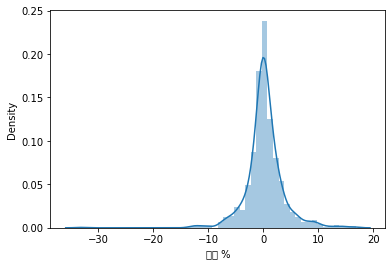

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(bitcoin['변동 %'])

## 변동성 범주화 및 데이터 병합

In [ ]:
np.abs(bitcoin['변동 %']).describe()

count    1002.000000
mean        2.175329
std         2.693811
min         0.000000
25%         0.482500
50%         1.285000
75%         2.877500
max        33.270000
Name: 변동 %, dtype: float64

In [ ]:
# 변동성

# 0: 변동성이 크고 가격 감소 (-Inf, -1.314)
# 1: 변동성이 작고 가격 감소 [-1.314, 0)
# 2: 변동성이 작고 가격 증가 [0, 1.7]
# 3: 변동성이 크고 가격 증가 (1.7, Inf)

bitcoin['변동성'] = [0 if p < -1.314 else 1 if p < 0 else 2 if p <= 1.7 else 3 for p in bitcoin['변동 %']]

In [ ]:
# 날짜별 글 개수에 영향을 받을 수 있으므로 동일한 날의 기사는 하나의 문장으로 변환
# 글이 많이 올라온 날은 거래량이 많고 변동성이 심할 것으로 예상하여 임의의 n개를 추출하지 않음
tmp = news.groupby('날짜')['기사'].transform(lambda x: '; '.join(x))

In [ ]:
tmp.drop_duplicates(inplace=True)

- 데이터 병합

In [ ]:
news = pd.concat([news['날짜'].drop_duplicates(), tmp], axis=1)
news.reset_index(inplace=True, drop=True)

In [ ]:
df = pd.merge(news, bitcoin[['날짜','변동성']],on='날짜')

In [ ]:
df.to_csv('output/news_merged.csv', index=False)

## 데이터 전처리 및 형태소 분석

- mecab, kkma, okt, kkaii, soynlp, rhino 등 다양한 형태소 분석기가 존재하나, 도메인에 따라 적합한 형태소 분석기가 다를 수 있다.  
- 일반적으로 mecab 형태소 분석기는 시간 효율성과 예측 정확도 측면에서 우수한 성능을 보이며, 사용자 사전을 추가할 수 있으므로 mecab을 사용하여 분석을 진행했다.  
- 명사와 동사, 형용사를 추출한다.

In [ ]:
cd 'data/output'

In [ ]:
df = pd.read_csv('news_merged.csv')

In [ ]:
# 특수문자 제거
df['기사'] = df['기사'].apply(lambda x : re.sub('[-=+,;#/\?:^$.@*\"※~&ㆍ!│』\\‘|\<\>`\'…》“”【】’·()_\[\]↑↓│]',' ',x))

In [ ]:
# 단어 빈도수 확인 - 사용자 사전 구축에 참고

# tmp = df['기사'].str.split()
# slist = [st for row in tmp for st in row]

# from collections import Counter

# words = sorted(Counter(slist).items(), key=lambda pair: pair[1], reverse=True)
# pd.DataFrame(words,
#              columns=['word', 'counts']).to_csv('./word_list_news.csv', index=False)

### 형태소 분석

In [ ]:
def posTagger(series, tag_list=['NNG', 'NNP', 'NN', 'NNS']): 

    import pandas as pd
    import nltk
    from konlpy.tag import Mecab
        
    mecab = Mecab()

    nouns = []
    for idx in range(len(series)):
        noun_list = []
        # 과제명과 키워드에서 명사를 추출한다.
        series[idx] = series[idx].replace('암호 화폐', '암호화폐').replace('블록 체인', '블록체인').replace('가상 화폐', '가상화폐').replace('비트 코인', '비트코인').replace('이더 리움', '이더리움')
        words = str(series[idx])
        words = words.lower()
        pos = mecab.pos(words)

        for word, tag in pos:
            if tag in tag_list:
                noun_list.append(word)
            if tag in ['SL']: # 외국어의 경우 nltk 형태소 분석기를 사용하여 추출한다.
                if word != 'nan':
                    pos = nltk.pos_tag(word.split())
                    for word, tag in pos:
                        if tag in tag_list:
                            noun_list.append(word)
            
        nouns.append(' '.join(noun_list))

    return nouns

#### 명사

In [ ]:
tmp = posTagger(df['기사'], tag_list=['NNG', 'NNP', 'NN', 'NNS']) # 명사 단어만 추출

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df['nouns'] = tmp

In [ ]:
df.tail()

,날짜,기사,변동성,nouns
997,2018.08.05.,업비트 가상화폐 예금 규모 담긴 실사 보고서 공개 스타벅스 가상화폐 시장 참여...,1,업비트 가상화폐 예금 규모 실사 보고서 공개 스타 벅스 가상화폐 시장 참여 비트코인...
998,2018.08.04.,그것이 알고싶다 신일그룹 최용석 신임대표 실제 회장은 유지범씨 신일그룹 보...,0,최용석 신임 대표 실제 회장 유지범 보물선 돈스코이 투자자 사기 친절 프리뷰 돈스코...
999,2018.08.03.,15년 전엔 동아건설 이번에 신일그룹 150조 금괴 돈스코이호 발견 데...,0,전 동아 건설 이번 신일 그룹 금괴 돈스코이 발견 데자 가상화폐 거래소 빗썸 오후 ...
1000,2018.08.02.,보물선 투자사기 의혹 수사 확대 서울경찰청 지능범죄수사대가 맡기로 보물선 투...,0,보물선 투자 사기 의혹 수사 확대 서울 경찰청 지능 범죄 수사대 보물선 투자 사기 ...
1001,2018.08.01.,이슈분석 무법에 손놓은 당국 소비자 보호 외면 아직도 암호화폐 정의 타 ...,0,이슈 분석 무법 당국 소비자 보호 외면 암호화폐 정의 필요 p p 보험 빗썸 암호화...


In [ ]:
df.to_csv('news_nouns_text_pos_tagged.csv', index=False)

#### 명사, 동사, 형용사

In [ ]:
tmp = posTagger(df['기사'], tag_list=['NNG', 'NNP', 'NN', 'NNS', 'VV', 'VA']) # 명사, 동사, 형용사 추출

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
df['nouns'] = tmp

In [ ]:
df.tail()

,날짜,기사,변동성,nouns
997,2018.08.05.,업비트 가상화폐 예금 규모 담긴 실사 보고서 공개 스타벅스 가상화폐 시장 참여...,1,업비트 가상화폐 예금 규모 실사 보고서 공개 스타 벅스 가상화폐 시장 참여 비트코인...
998,2018.08.04.,그것이 알고싶다 신일그룹 최용석 신임대표 실제 회장은 유지범씨 신일그룹 보...,0,알 최용석 신임 대표 실제 회장 유지범 보물선 돈스코이 투자자 사기 친절 프리뷰 알...
999,2018.08.03.,15년 전엔 동아건설 이번에 신일그룹 150조 금괴 돈스코이호 발견 데...,0,전 동아 건설 이번 신일 그룹 금괴 돈스코이 발견 데자 가상화폐 거래소 빗썸 오후 ...
1000,2018.08.02.,보물선 투자사기 의혹 수사 확대 서울경찰청 지능범죄수사대가 맡기로 보물선 투...,0,보물선 투자 사기 의혹 수사 확대 서울 경찰청 지능 범죄 수사대 맡 보물선 투자 사...
1001,2018.08.01.,이슈분석 무법에 손놓은 당국 소비자 보호 외면 아직도 암호화폐 정의 타 ...,0,이슈 분석 무법 손놓 당국 소비자 보호 외면 암호화폐 정의 필요 만드 p p 보험 ...


In [ ]:
df.to_csv('news_all_text_pos_tagged.csv', index=False)

# 지도학습 기반 감성분석

- 단어별 감성스코어 추출 (엘라스틱넷을 적용한 로지스틱 회귀분석, 그리드서치를 통해 최적 파라미터 선정)
- 날짜별 감성스코어 추출 (변동성의 크기와 방향에 따라)

In [ ]:
cd 'data/output'

In [ ]:
import pandas as pd
import numpy as np

## 감성사전 구축

### 명사

In [ ]:
pos = 'nouns'
df = pd.read_csv('news_'+pos+'_text_pos_tagged.csv')
print(df['변동성'].value_counts())

2    307
1    243
3    234
0    218
Name: 변동성, dtype: int64


In [ ]:
# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

#### 방법 1

##### 모델 학습

In [ ]:
method_vol = '1'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_1'][df['변동성_1'].notnull()]
feature = df['nouns'][df['변동성_1'].notnull()]

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # tfidf 임베딩
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312, # 엘라스틱넷을 적용한 로지스틱회귀
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.95, 0.98, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.0005, 0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.0005, 0.001, 0.0013],
 'el_clf__l1_ratio': [0.95, 0.98, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   13.3s


done in 49.274s

Best score: 0.620
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.95
	tfidf_vect__min_df: 1
	tfidf_vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   49.1s finished


In [ ]:
model = grid_search.best_estimator_ # 최적 파라미터로 모델 생성

In [ ]:
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.95, learning_rate='optimal',
                   

- 생성한 모델의 정확도

In [ ]:
pred = model.predict(X_test)
print(accuracy_score(y_test, pred))

0.5367647058823529


- 모델 결과

In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names() # 단어 행렬의 단어 변수 추출
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 42 variables and eliminated the other 10846 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

##### score 산출

In [ ]:
import pickle

# 감성 지수 불러오기
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    # 회귀계수가 양수일 경우 긍정 단어, 음수일 경우 부정 단어로 변환
    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0 # 긍정 단어
        ne = 0 # 부정 단어

        if method=='count': # 단순 단어 개수 활용
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score': # 단어의 회귀계수 활용
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

- 긍부정 단어 개수를 활용하여 일자별 감성 스코어 산출

100%|██████████| 1002/1002 [00:00<00:00, 3719.86it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


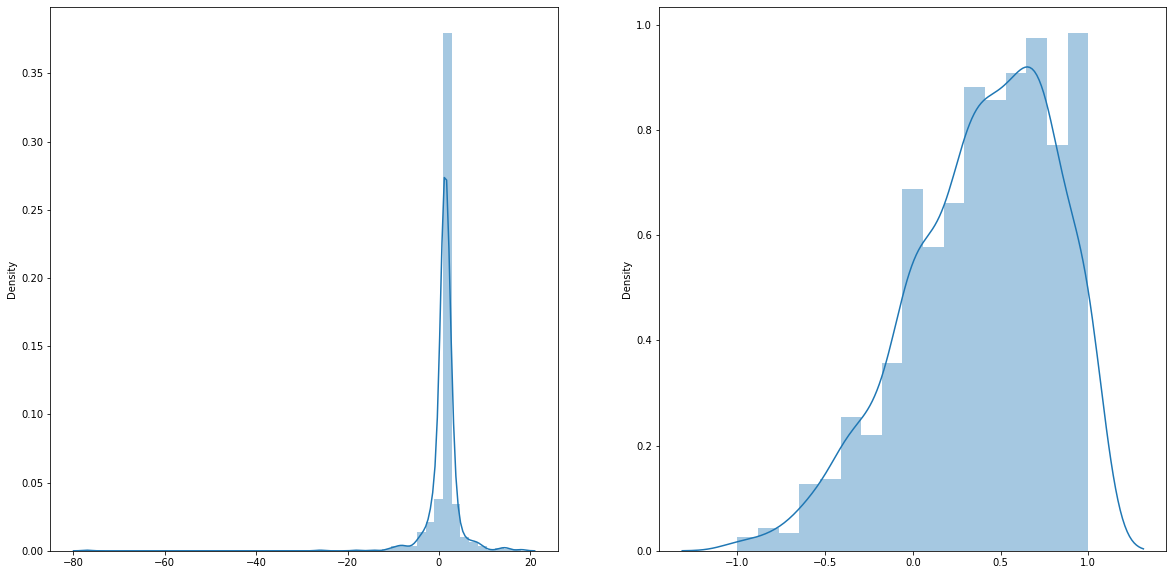

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

- 긍부정 단어의 회귀계수를 활용하여 감성 스코어 산출

100%|██████████| 1002/1002 [00:02<00:00, 436.20it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


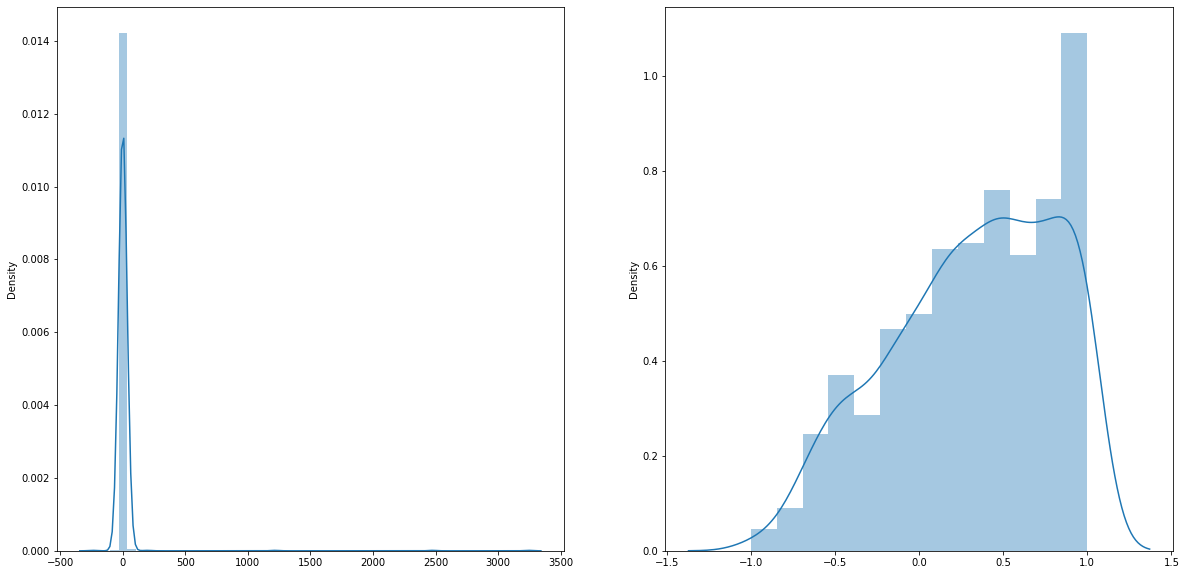

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

#### 방법 2

##### 모델 학습 - 크기

In [ ]:
method_vol = '2_크기'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_크기']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.093, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013],
 'el_clf__l1_ratio': [0.093, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   59.6s finished


done in 60.702s

Best score: 0.628
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.093
	tfidf_vect__min_df: 2
	tfidf_vect__ngram_range: (1, 2)


In [ ]:
model = grid_search.best_estimator_

In [ ]:
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.093, learning_rate='optimal',
                  

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5780730897009967


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 3421 variables and eliminated the other 27681 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

##### score 산출 - 크기

In [ ]:
import pickle

# 감성 지수 불러오기
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 1002/1002 [00:11<00:00, 86.13it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


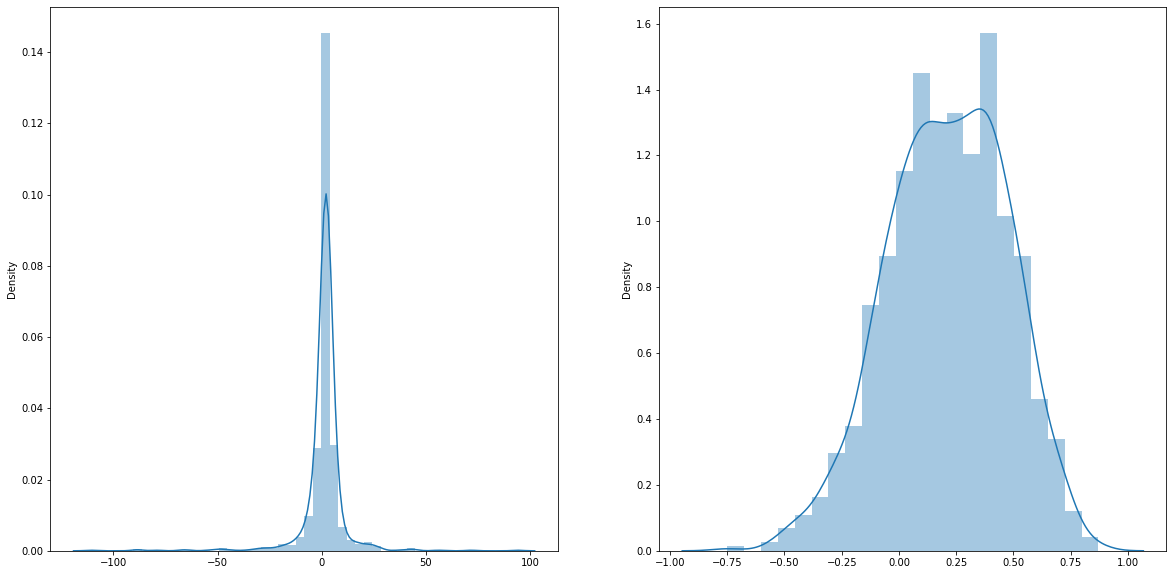

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 1002/1002 [00:02<00:00, 432.46it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


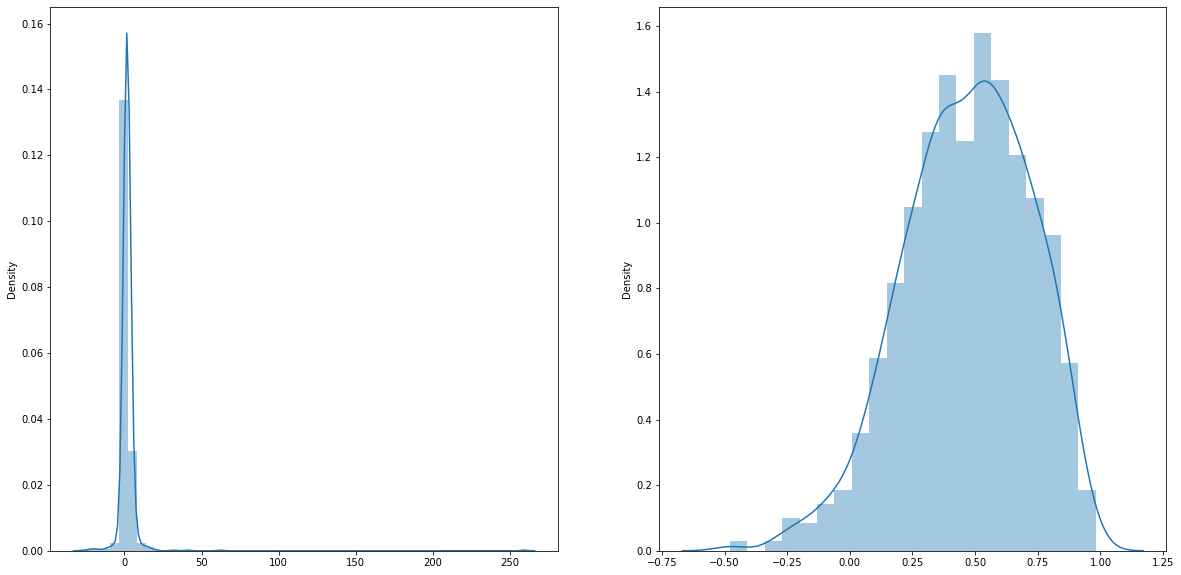

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

##### 모델 학습 - 방향

In [ ]:
method_vol = '2_방향'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_방향']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.093, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013],
 'el_clf__l1_ratio': [0.093, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished


done in 63.487s

Best score: 0.525
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.093
	tfidf_vect__min_df: 2
	tfidf_vect__ngram_range: (1, 2)


In [ ]:
model = grid_search.best_estimator_

In [ ]:
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.093, learning_rate='optimal',
                  

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5016611295681063


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 3320 variables and eliminated the other 28541 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

##### score 산출 - 방향

In [ ]:
import pickle

# 감성 지수 불러오기
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 1002/1002 [00:11<00:00, 84.40it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


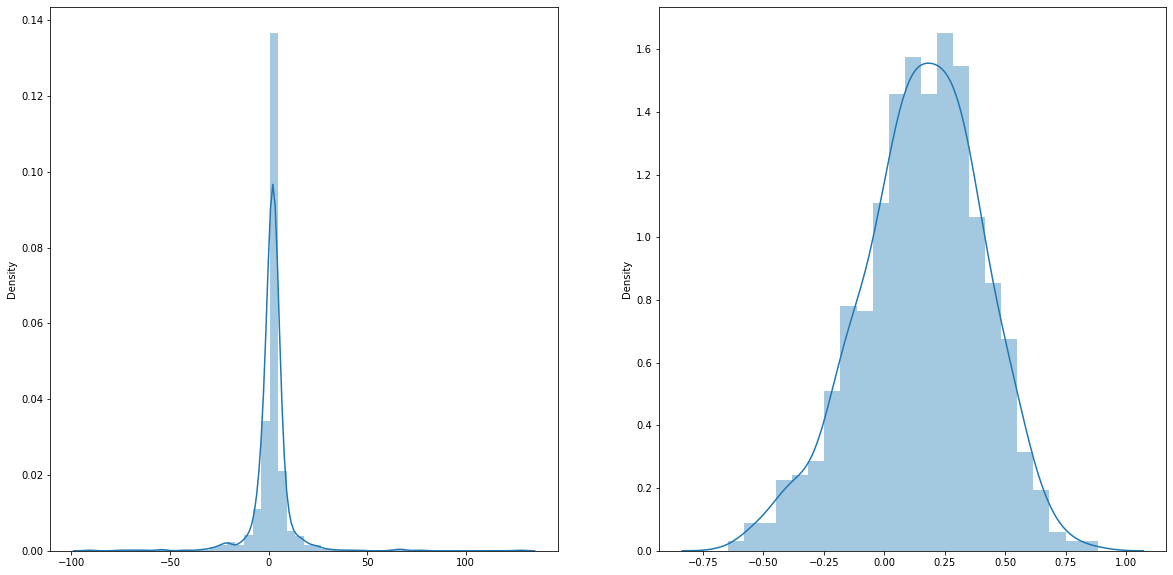

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 1002/1002 [00:02<00:00, 426.25it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


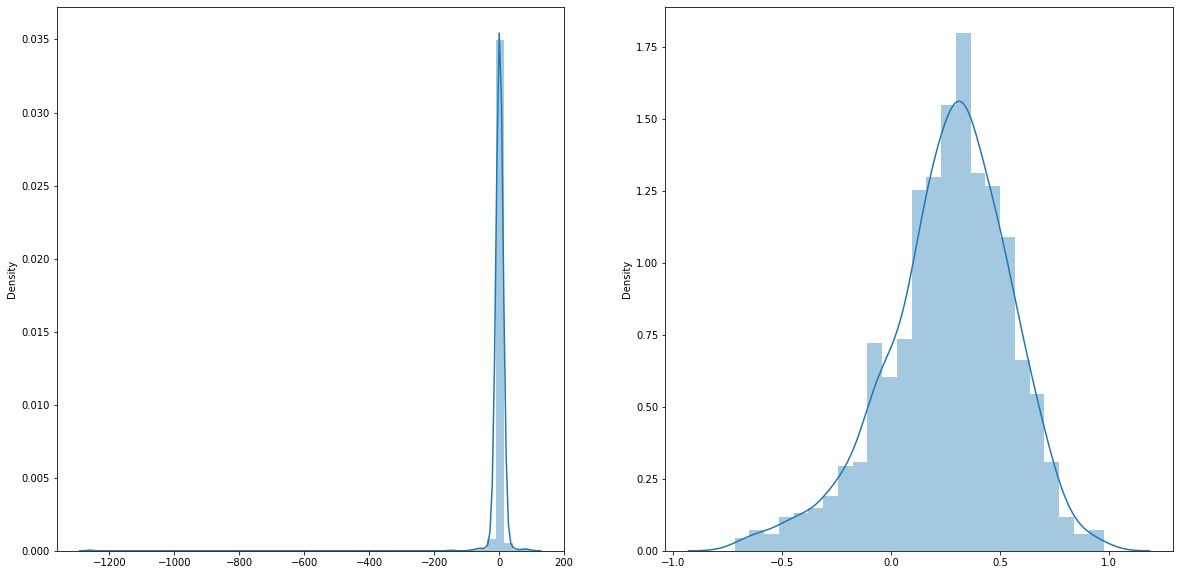

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

### 명사, 동사, 형용사

In [ ]:
pos = 'all'
df = pd.read_csv('news_'+pos+'_text_pos_tagged.csv')
print(df['변동성'].value_counts())

2    307
1    243
3    234
0    218
Name: 변동성, dtype: int64


In [ ]:
# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

#### 방법 1

In [ ]:
method_vol = '1'

##### 모델 학습

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_1'][df['변동성_1'].notnull()]
feature = df['nouns'][df['변동성_1'].notnull()]

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.09, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013, 0.0015], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013, 0.0015],
 'el_clf__l1_ratio': [0.09, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.6s


done in 49.689s

Best score: 0.620
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.95
	tfidf_vect__min_df: 1
	tfidf_vect__ngram_range: (1, 1)


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   49.5s finished


In [ ]:
model = grid_search.best_estimator_

In [ ]:
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.95, learning_rate='optimal',
                   

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5367647058823529


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 41 variables and eliminated the other 11289 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

##### score 산출

In [ ]:
import pickle

# 감성 지수 불러오기
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 1002/1002 [00:00<00:00, 3598.36it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


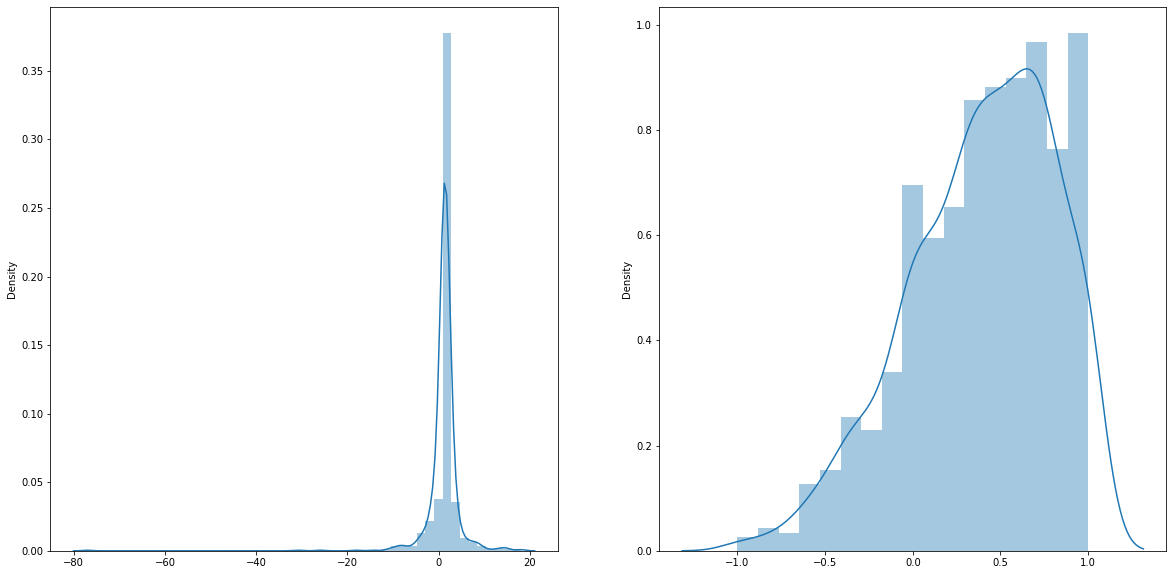

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 1002/1002 [00:02<00:00, 422.10it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


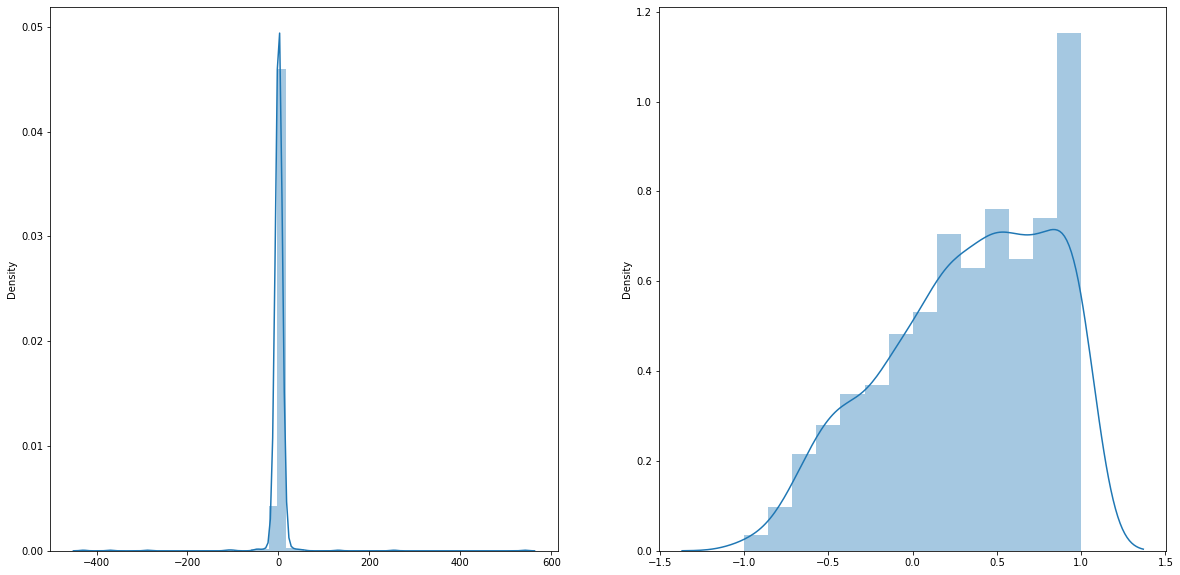

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

#### 방법 2

##### 모델 학습 - 크기

In [ ]:
method_vol = '2_크기'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_크기']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.093, 0.95, 1], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013],
 'el_clf__l1_ratio': [0.093, 0.95, 1],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.0min finished


done in 62.666s

Best score: 0.625
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.093
	tfidf_vect__min_df: 2
	tfidf_vect__ngram_range: (1, 2)


In [ ]:
model = grid_search.best_estimator_

In [ ]:
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.093, learning_rate='optimal',
                  

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.5780730897009967


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 3434 variables and eliminated the other 28192 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

In [ ]:
import pickle

# 감성 지수 저장
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

##### score 산출 - 크기

In [ ]:
import pickle

# 감성 지수 불러오기
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 1002/1002 [00:12<00:00, 78.44it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


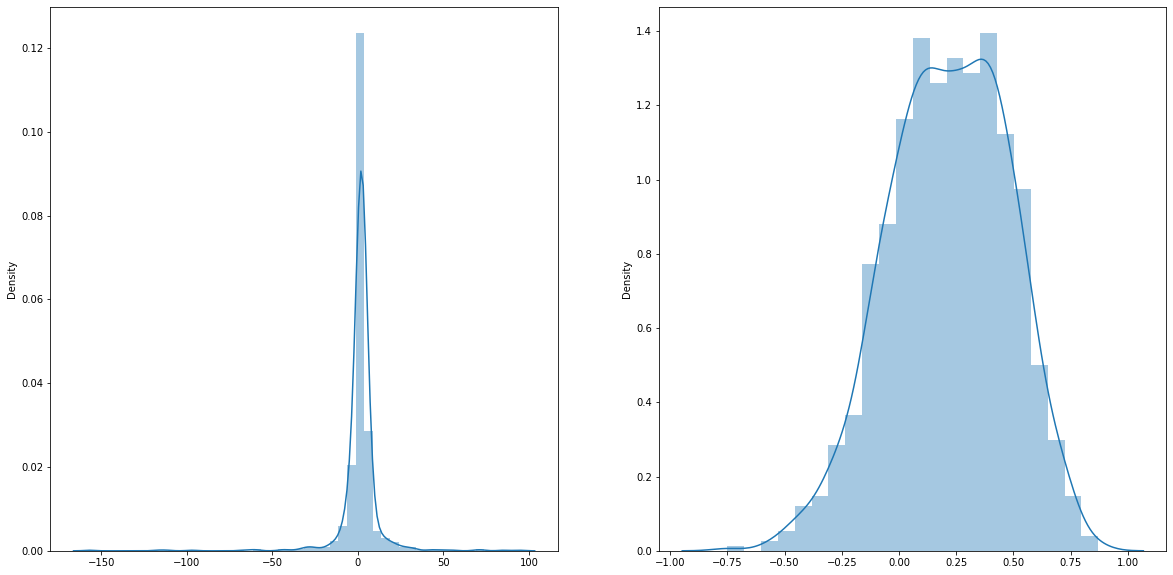

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 1002/1002 [00:02<00:00, 427.32it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


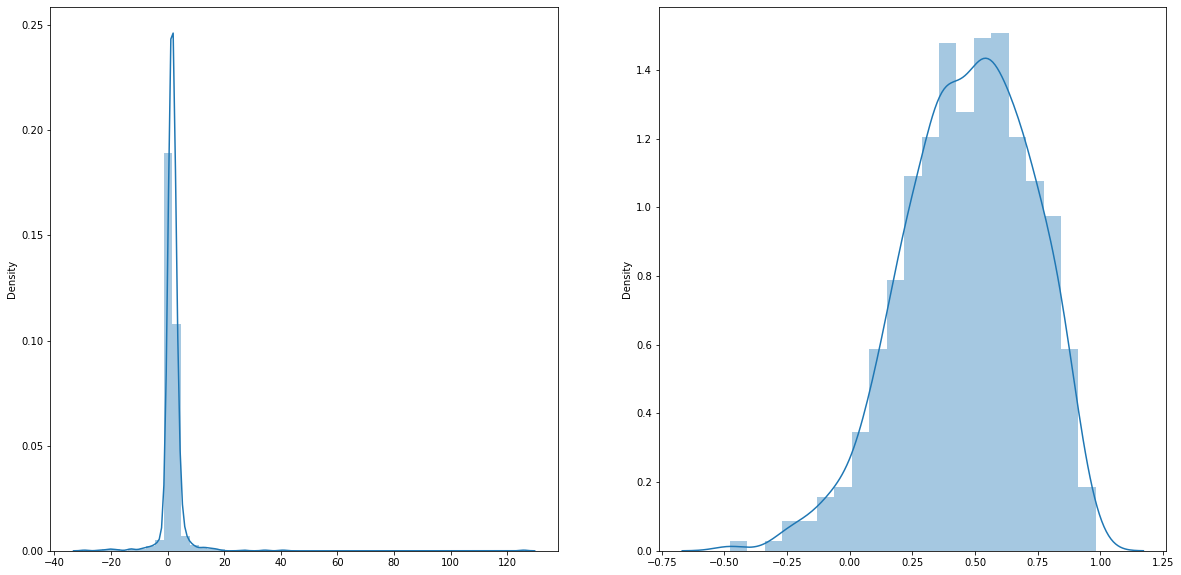

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

##### 모델 학습 - 방향

In [ ]:
method_vol = '2_방향'

In [ ]:
# Pipeline을 통해서 텍스트를 벡터화시키고 모델 학습시키기!
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score

# 학습, 테스트 데이터 분리
target = df['변동성_방향']
feature = df['nouns']

X_train, X_test, y_train, y_test = train_test_split(feature,
                                                    target,
                                                    test_size=0.3,
                                                    stratify = target,
                                                    random_state=312)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import ElasticNet, SGDClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english', ngram_range=(1,2))), # (1,1)
    ('el_clf', SGDClassifier(penalty = 'elasticnet', max_iter=5000, random_state=312,
                             loss='log',  # log: logistic regression
                             class_weight='balanced'))]) 

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0001, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.15, learning_rate='optimal',
                   

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf_vect', 'el_clf', 'tfidf_vect__analyzer', 'tfidf_vect__binary', 'tfidf_vect__decode_error', 'tfidf_vect__dtype', 'tfidf_vect__encoding', 'tfidf_vect__input', 'tfidf_vect__lowercase', 'tfidf_vect__max_df', 'tfidf_vect__max_features', 'tfidf_vect__min_df', 'tfidf_vect__ngram_range', 'tfidf_vect__norm', 'tfidf_vect__preprocessor', 'tfidf_vect__smooth_idf', 'tfidf_vect__stop_words', 'tfidf_vect__strip_accents', 'tfidf_vect__sublinear_tf', 'tfidf_vect__token_pattern', 'tfidf_vect__tokenizer', 'tfidf_vect__use_idf', 'tfidf_vect__vocabulary', 'el_clf__alpha', 'el_clf__average', 'el_clf__class_weight', 'el_clf__early_stopping', 'el_clf__epsilon', 'el_clf__eta0', 'el_clf__fit_intercept', 'el_clf__l1_ratio', 'el_clf__learning_rate', 'el_clf__loss', 'el_clf__max_iter', 'el_clf__n_iter_no_change', 'el_clf__n_jobs', 'el_clf__penalty', 'el_clf__power_t', 'el_clf__random_state', 'el_clf__shuffle', 'el_clf__tol', 'el_clf__validation_fraction', 'el_clf__ve

In [ ]:
# https://inuplace.tistory.com/516

params = {"el_clf__l1_ratio": [0.05, 0.08, 0.09, 0.093], # L1 규제의 비율(Elastic-Net 믹싱 파라미터 경우에만 사용) (default=0.15)
          "el_clf__alpha": [0.001, 0.0013, 0.0015], #regularization param, 값이 클수록 강력한 정규화(규제) 설정 (default=0.0001)
          "tfidf_vect__min_df": [1, 2], #min count of words allowed
          "tfidf_vect__ngram_range": [(1,1), (1,2)]
          } 


In [ ]:
if __name__ == "__main__":
    from pprint import pprint
    from time import time   

    # https://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html
    
    grid_search = GridSearchCV(pipeline, params, n_jobs=-1, verbose=1)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(params)
    t0 = time()
    grid_search.fit(X_train, y_train)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(params.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf_vect', 'el_clf']
parameters:
{'el_clf__alpha': [0.001, 0.0013, 0.0015],
 'el_clf__l1_ratio': [0.05, 0.08, 0.09, 0.093],
 'tfidf_vect__min_df': [1, 2],
 'tfidf_vect__ngram_range': [(1, 1), (1, 2)]}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  2.2min finished


done in 131.698s

Best score: 0.528
Best parameters set:
	el_clf__alpha: 0.0013
	el_clf__l1_ratio: 0.093
	tfidf_vect__min_df: 2
	tfidf_vect__ngram_range: (1, 2)


In [ ]:
model = grid_search.best_estimator_

In [ ]:
model

Pipeline(memory=None,
         steps=[('tfidf_vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=2, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token...
                 SGDClassifier(alpha=0.0013, average=False,
                               class_weight='balanced', early_stopping=False,
                               epsilon=0.1, eta0=0.0, fit_intercept=True,
                               l1_ratio=0.093, learning_rate='optimal',
                  

In [ ]:
pred = model.predict(X_test)
# pred_prods = model.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test, pred))

0.4983388704318937


In [ ]:
vocab = model.named_steps['tfidf_vect'].get_feature_names()
coef = pd.Series(model.named_steps['el_clf'].coef_.flatten(), index = vocab) # https://www.kaggle.com/cast42/feature-selection-and-elastic-net

In [ ]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 3309 variables and eliminated the other 29064 variables


In [ ]:
coef = pd.DataFrame(coef)
coef.columns = ['score']

##### score 산출 - 방향

In [ ]:
import pickle

# 감성 지수 저장
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(coef, f)

# 감성 지수 불러오기
with open('news_'+pos+'_sentiment_words_'+method_vol+'.pkl', 'rb') as f:
    coef = pickle.load(f)

In [ ]:
def cal_score(text_series, coef, method, ):

    """
    날짜별 감성지수 산출
    """

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from collections import Counter
    from tqdm import tqdm 

    sen_score = {'sen_score1': [], 'sen_score2': []}

    sentiment_words = {'positive': list(coef[coef['score'] > 0].index),
                       'negative': list(coef[coef['score'] < 0].index)}

    for sentence in tqdm(text_series):
        po = 0
        ne = 0

        if method=='count':
            for word, counts in Counter(sentence.split()).items():
                if word in sentiment_words['positive']:
                    po += counts
                elif word in sentiment_words['negative']:
                    ne += counts

        elif method=='score':
            for word, counts in Counter(sentence.split()).items():
                if word in coef.index:
                    score = coef.loc[word,'score']*counts
                    if score > 0:
                        po += score
                    elif score < 0:
                        ne += np.abs(score)
       
        # 감성 지수를 산출하는 방법을 두 가지로 나누어 비교한다.
        # 1: po/(po-ne); 머신 러닝 기반 소셜 빅데이터 분석을 이용한 금융자산 트레이딩 모델의 성능 향상에 관한 연구
        # 2: (po-ne)/(po+ne); 평점과 리뷰 텍스트 감성분석을 결합한 추천시스템 향상 방안 연구
        if (po-ne) == 0:
            sen_score1 = np.nan
        else:
            sen_score1 = po/(po-ne)

        if (po+ne) != 0:
            sen_score2 = (po-ne)/(po+ne)
        else:
            sen_score2 = np.nan
        
        sen_score['sen_score1'].append(sen_score1)
        sen_score['sen_score2'].append(sen_score2)


    f,axes = plt.subplots(1,2, figsize=(20,10))
    sns.distplot(sen_score['sen_score1'], ax=axes[0])  
    sns.distplot(sen_score['sen_score2'], ax=axes[1])  

    return sen_score

100%|██████████| 1002/1002 [00:12<00:00, 80.00it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


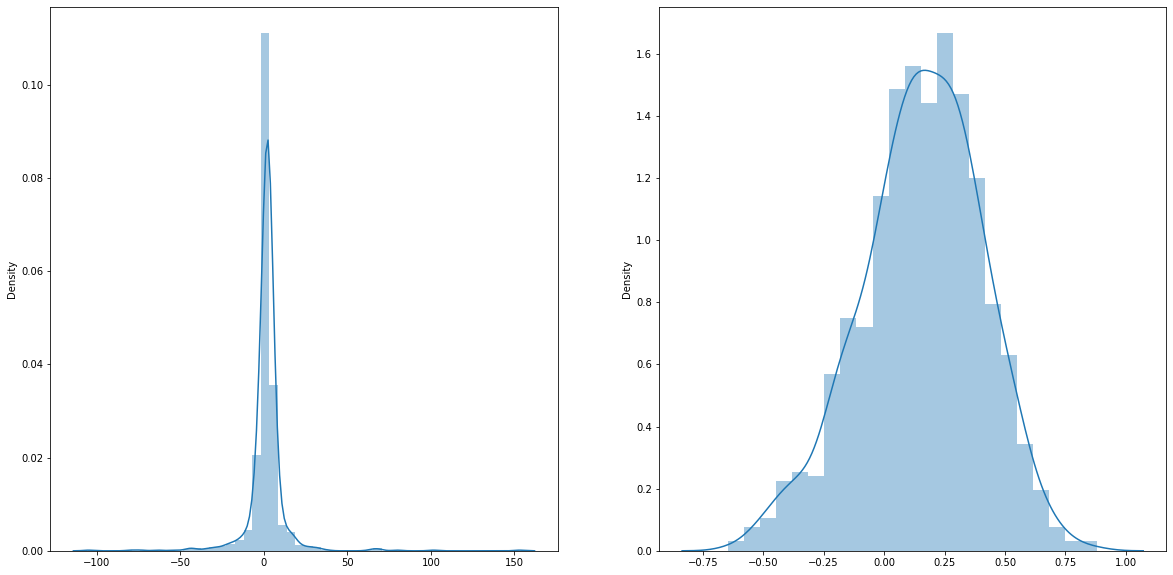

In [ ]:
method = 'count'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

100%|██████████| 1002/1002 [00:02<00:00, 426.47it/s]
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


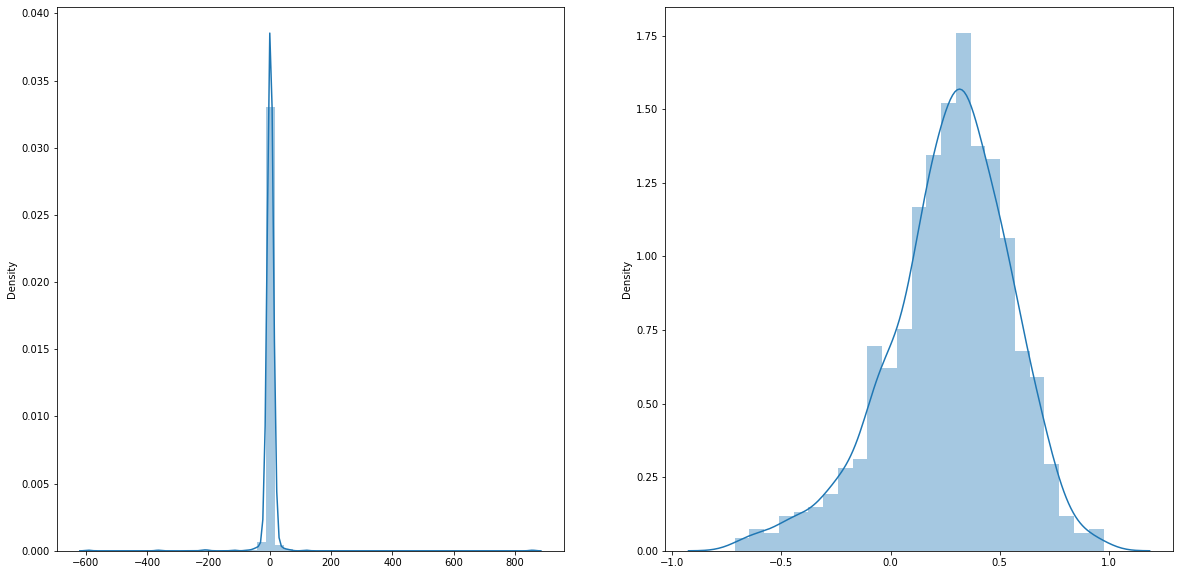

In [ ]:
method = 'score'
sen_score = cal_score(df['nouns'], coef, method=method)

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'wb') as f:
    pickle.dump(sen_score, f)

# 감성사전 성능 비교
- 감성스코어 성능 평가 (변동성에 따라 제대로 분류되었는지 확인)
- nan 값 보간

In [ ]:
cd 'data/output'

/content/drive/MyDrive/git/2021-1_DM/Data/news


In [ ]:
import pandas as pd
import numpy as np
import pickle

- 감성사전을 활용, score 산출 방식에 따라 변동성을 예측하였다.

In [ ]:
def check_accuracy(volatility, positive_class, score):
    from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
    import numpy as np

    volatility = [1 if p in positive_class else 0 for p in volatility] # 변동성 그룹핑
    # mean_score = np.mean(score)
    predicted = [1 if p >= 0 else 0 for p in score] # 감성 스코어가 양수일 경우 1, 음수일 경우 0

    f1 = f1_score(volatility, predicted)
    acc = accuracy_score(volatility, predicted)
    pr = precision_score(volatility, predicted)
    rc = recall_score(volatility, predicted)

    print('F1 Score: %.3f\nAccuracy Score: %.3f\nPrecision Score: %.3f\nRecall Score: %.3f' % (f1, acc, pr, rc))

    return f1, acc

In [ ]:
result = {'pos_tag': [], 'method1': [], 'method2': [], 'formula': [], 'f1': [], 'acc': []}

### 명사

In [ ]:
pos = 'nouns'
method = 'count'

df = pd.read_csv('news_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1']) # 단순 단어 개수 적용
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2']) # 단어의 회귀계수 적용
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.410
Accuracy Score: 0.391
Precision Score: 0.265
Recall Score: 0.906
--------------------------------------
F1 Score: 0.402
Accuracy Score: 0.356
Precision Score: 0.257
Recall Score: 0.927
============ 방법 2(크기) ============
F1 Score: 0.719
Accuracy Score: 0.656
Precision Score: 0.569
Recall Score: 0.976
--------------------------------------
F1 Score: 0.712
Accuracy Score: 0.643
Precision Score: 0.559
Recall Score: 0.980
============ 방법 2(방향) ============
F1 Score: 0.786
Accuracy Score: 0.727
Precision Score: 0.681
Recall Score: 0.928
--------------------------------------
F1 Score: 0.779
Accuracy Score: 0.715
Precision Score: 0.669
Recall Score: 0.933


In [ ]:
pos = 'nouns'
method = 'score'

df = pd.read_csv('news_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.417
Accuracy Score: 0.433
Precision Score: 0.274
Recall Score: 0.868
--------------------------------------
F1 Score: 0.418
Accuracy Score: 0.436
Precision Score: 0.275
Recall Score: 0.868
============ 방법 2(크기) ============
F1 Score: 0.633
Accuracy Score: 0.482
Precision Score: 0.465
Recall Score: 0.991
--------------------------------------
F1 Score: 0.633
Accuracy Score: 0.482
Precision Score: 0.465
Recall Score: 0.991
============ 방법 2(방향) ============
F1 Score: 0.743
Accuracy Score: 0.648
Precision Score: 0.613
Recall Score: 0.945
--------------------------------------
F1 Score: 0.743
Accuracy Score: 0.648
Precision Score: 0.613
Recall Score: 0.945


### 명사, 동사, 형용사

In [ ]:
pos = 'all'
method = 'score'

df = pd.read_csv('news_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]


print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.416
Accuracy Score: 0.430
Precision Score: 0.273
Recall Score: 0.868
--------------------------------------
F1 Score: 0.417
Accuracy Score: 0.433
Precision Score: 0.274
Recall Score: 0.868
============ 방법 2(크기) ============
F1 Score: 0.633
Accuracy Score: 0.482
Precision Score: 0.465
Recall Score: 0.991
--------------------------------------
F1 Score: 0.633
Accuracy Score: 0.482
Precision Score: 0.465
Recall Score: 0.991
============ 방법 2(방향) ============
F1 Score: 0.743
Accuracy Score: 0.647
Precision Score: 0.612
Recall Score: 0.946
--------------------------------------
F1 Score: 0.743
Accuracy Score: 0.647
Precision Score: 0.612
Recall Score: 0.946


In [ ]:
pos = 'all'
method = 'count'

df = pd.read_csv('news_'+pos+'_text_pos_tagged.csv')
df = df[df['nouns'].notnull()]

# 방법 1. 변동성과 방향을 함께 고려
df['변동성_1'] = [0 if vol == 0 else 1 if vol == 3 else np.nan for vol in df['변동성']]

# 방법 2. 변동성의 크기와 방향을 구분하여 고려
df['변동성_크기'] = [0 if vol in [1, 2] else 1 if vol in [0, 3] else np.nan for vol in df['변동성']]
df['변동성_방향'] = [0 if vol in [0, 1] else 1 if vol in [2, 3] else np.nan for vol in df['변동성']]

print('='*15 + ' 방법 1 ' + '='*15)
method_vol = '1' # 0 / 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)




print('='*12 + ' 방법 2(크기) ' + '='*12)
method_vol = '2_크기' # 0, 3 / 1, 2

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)

print('-'*38)
f1, acc = check_accuracy(df['변동성'], [0, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)



print('='*12 + ' 방법 2(방향) ' + '='*12)
method_vol = '2_방향'# 0, 1 / 2, 3

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)
    
f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score1'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score1')
result['f1'].append(f1)
result['acc'].append(acc)
print('-'*38)

f1, acc = check_accuracy(df['변동성'], [2, 3], sen_score['sen_score2'])
result['pos_tag'].append(pos)
result['method1'].append(method)
result['method2'].append(method_vol)
result['formula'].append('sen_score2')
result['f1'].append(f1)
result['acc'].append(acc)

print('='*38)

=============== 방법 1 ===============
F1 Score: 0.409
Accuracy Score: 0.390
Precision Score: 0.264
Recall Score: 0.902
--------------------------------------
F1 Score: 0.401
Accuracy Score: 0.356
Precision Score: 0.256
Recall Score: 0.923
============ 방법 2(크기) ============
F1 Score: 0.717
Accuracy Score: 0.651
Precision Score: 0.565
Recall Score: 0.980
--------------------------------------
F1 Score: 0.710
Accuracy Score: 0.639
Precision Score: 0.557
Recall Score: 0.980
============ 방법 2(방향) ============
F1 Score: 0.783
Accuracy Score: 0.723
Precision Score: 0.677
Recall Score: 0.928
--------------------------------------
F1 Score: 0.783
Accuracy Score: 0.720
Precision Score: 0.673
Recall Score: 0.935


## 최종 점수 추출

In [ ]:
result = pd.DataFrame(result)

In [ ]:
result[result['pos_tag']=='nouns'].sort_values(by=['f1'], ascending=False)

,pos_tag,method1,method2,formula,f1,acc
4,nouns,count,2_방향,sen_score1,0.785603,0.726547
5,nouns,count,2_방향,sen_score2,0.779321,0.714571
10,nouns,score,2_방향,sen_score1,0.743273,0.647705
11,nouns,score,2_방향,sen_score2,0.743273,0.647705
2,nouns,count,2_크기,sen_score1,0.718826,0.655689
3,nouns,count,2_크기,sen_score2,0.712219,0.642715
8,nouns,score,2_크기,sen_score1,0.633216,0.482036
9,nouns,score,2_크기,sen_score2,0.633216,0.482036
7,nouns,score,1,sen_score2,0.418126,0.436128
6,nouns,score,1,sen_score1,0.416838,0.433134


In [ ]:
result[result['pos_tag']=='all'].sort_values(by=['f1'], ascending=False)

,pos_tag,method1,method2,formula,f1,acc
22,all,count,2_방향,sen_score1,0.783151,0.722555
23,all,count,2_방향,sen_score2,0.782676,0.719561
16,all,score,2_방향,sen_score1,0.743106,0.646707
17,all,score,2_방향,sen_score2,0.743106,0.646707
20,all,count,2_크기,sen_score1,0.716828,0.650699
21,all,count,2_크기,sen_score2,0.709936,0.638723
14,all,score,2_크기,sen_score1,0.633216,0.482036
15,all,score,2_크기,sen_score2,0.633216,0.482036
13,all,score,1,sen_score2,0.416838,0.433134
12,all,score,1,sen_score1,0.415558,0.430140


In [ ]:
result = result.sort_values(by=['acc'], ascending=False)
result

,pos_tag,method1,method2,formula,f1,acc
4,nouns,count,2_방향,sen_score1,0.785603,0.726547
22,all,count,2_방향,sen_score1,0.783151,0.722555
23,all,count,2_방향,sen_score2,0.782676,0.719561
5,nouns,count,2_방향,sen_score2,0.779321,0.714571
2,nouns,count,2_크기,sen_score1,0.718826,0.655689
20,all,count,2_크기,sen_score1,0.716828,0.650699
11,nouns,score,2_방향,sen_score2,0.743273,0.647705
10,nouns,score,2_방향,sen_score1,0.743273,0.647705
17,all,score,2_방향,sen_score2,0.743106,0.646707
16,all,score,2_방향,sen_score1,0.743106,0.646707


In [ ]:
result.to_csv('news_final_score.csv', index=False) # 조합별 최종 성능 비교

In [ ]:
result.groupby('method2').head(1) # 각 종속변수에 따른 최적 성능 조합 추출

,pos_tag,method1,method2,formula,f1,acc
4,nouns,count,2_방향,sen_score1,0.785603,0.726547
2,nouns,count,2_크기,sen_score1,0.718826,0.655689
7,nouns,score,1,sen_score2,0.418126,0.436128


In [ ]:
final_score = pd.DataFrame(df['날짜'])


pos = 'nouns'
method = 'score'


method_vol = '1'

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)

final_score['뉴스_변동성_전체'] = sen_score['sen_score2']


pos = 'nouns'
method = 'count'

method_vol = '2_크기'

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)

final_score['뉴스_변동성_크기'] = sen_score['sen_score1']



method_vol = '2_방향'

with open('news_'+pos+'_sen_score_'+method+'_'+method_vol+'.pkl', 'rb') as f:
    sen_score = pickle.load(f)

final_score['뉴스_변동성_방향'] = sen_score['sen_score1']

In [ ]:
final_score.to_csv('news_volatility.csv', index=False)

In [ ]:
# nan 값은 앞 뒤 데이터의 평균으로 보간
final_score['뉴스_변동성_방향'] = final_score['뉴스_변동성_방향'].interpolate()
final_score['뉴스_변동성_크기'] = final_score['뉴스_변동성_크기'].interpolate()
final_score['뉴스_변동성_전체'] = final_score['뉴스_변동성_전체'].interpolate()

In [ ]:
final_score.to_csv('news_volatility_interpolated.csv', index=False)